In [ ]:
pip install opendatasets

In [ ]:
import opendatasets as od
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models,layers
import numpy as np

In [ ]:
dataset = od.download(
    "https://www.kaggle.com/datasets/trainingdatapro/computed-tomography-ct-of-the-abdomen/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mominulislamayan
Your Kaggle Key: ··········


100%|██████████| 402M/402M [00:14<00:00, 28.7MB/s]


In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(

    '/content/computed-tomography-ct-of-the-abdomen/files/files',
    shuffle=True,
    image_size = (256,256),
    batch_size = 32


)

Found 1428 files belonging to 9 classes.


In [ ]:
class_names= dataset.class_names

In [ ]:
class_names

['abdominal_aorta_dilatation',
 'aneurysmal_dilatation_of_aorta',
 'aortic_aneurysm',
 'cancer',
 'formation_of_adrenal_gland',
 'kidney_development',
 'liver_formation',
 'urolithiasis',
 'vertebral_compression_fracture']

In [ ]:
class_names= dataset.class_names

45

In [ ]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[6 6 8 1 6 7 7 0 0 6 4 1 8 8 8 5 5 6 3 2 1 7 4 8 5 1 1 1 7 3 5 3]


(256, 256, 3)


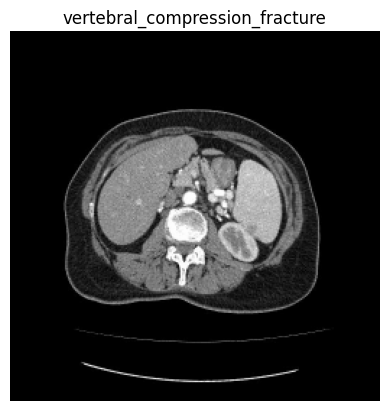

In [ ]:
def showOneImage(dataset):
  for image_batch,label_batch in dataset.take(1):
      print(image_batch[0].shape)
      plt.axis('off')
      plt.imshow(image_batch[0].numpy().astype('uint8'))
      plt.title(class_names[label_batch[0]])

showOneImage(dataset)

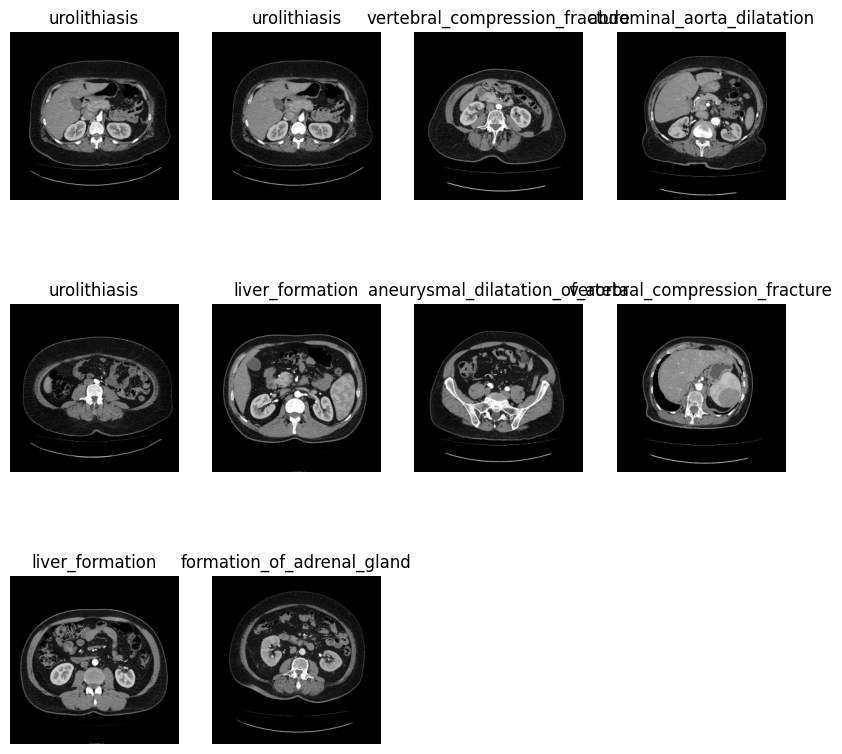

In [ ]:
def showTenImage(dataset):
  plt.figure(figsize=(10,10))
  for image_batch,label_batch in dataset.take(1):
    for i in range(10):
        ax = plt.subplot(3,4,i+1)
        plt.axis('off')
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])

showTenImage(dataset)

In [ ]:
def get_dataset_partition_tf(dataset,train_split,val_split,test_split,shuffle=10000):

  dataset_size = len(dataset)

  if shuffle:
    dataset = dataset.shuffle(shuffle,seed=21)


  train_size = int(dataset_size*train_split)
  validation_size = int(val_split*dataset_size)

  train_dataset = dataset.take(train_size)
  validation_dataset = dataset.skip(train_size).take(validation_size)
  test_dataset = dataset.skip(train_size).skip(validation_size)

  return train_dataset,validation_dataset,test_dataset

In [ ]:
train_ds , val_ds, test_ds = get_dataset_partition_tf(dataset,0.8,0.1,0.1)

In [ ]:
len(train_ds),len(val_ds),len(test_ds)

(36, 4, 5)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(256,256),
    layers.experimental.preprocessing.Rescaling(1.0/256),
])

model = models.Sequential([
    resize_and_rescale,


    layers.Conv2D(filters=32,kernel_size=(3,3),input_shape=(32,256,256,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),


    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(9,activation='softmax')

    ])

model.build((32,256,256,3))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 128)        

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(train_ds,epochs=5,batch_size=32,verbose=1,validation_data=val_ds)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


36/36 [==============================] - 22s 177ms/step - loss: 1.3584 - accuracy: 0.4789 - val_loss: 0.1171 - val_accuracy: 0.9688
Epoch 2/5
36/36 [==============================] - 7s 130ms/step - loss: 0.0475 - accuracy: 0.9816 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 3/5
36/36 [==============================] - 8s 133ms/step - loss: 6.2374e-04 - accuracy: 1.0000 - val_loss: 5.9183e-05 - val_accuracy: 1.0000
Epoch 4/5
36/36 [==============================] - 7s 148ms/step - loss: 4.0730e-05 - accuracy: 1.0000 - val_loss: 3.2008e-05 - val_accuracy: 1.0000
Epoch 5/5
36/36 [==============================] - 8s 126ms/step - loss: 2.0333e-05 - accuracy: 1.0000 - val_loss: 1.5310e-05 - val_accuracy: 1.0000


In [ ]:
model.evaluate(test_ds)

5/5 [==============================] - 4s 33ms/step - loss: 1.4874e-05 - accuracy: 1.0000


[1.487376448494615e-05, 1.0]

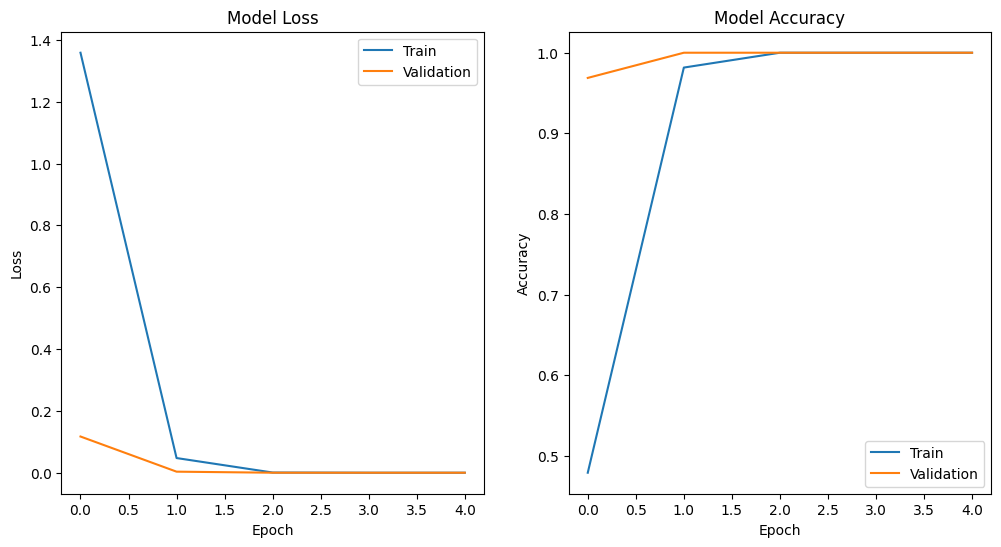

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

1/1 [==============================] - 0s 18ms/step


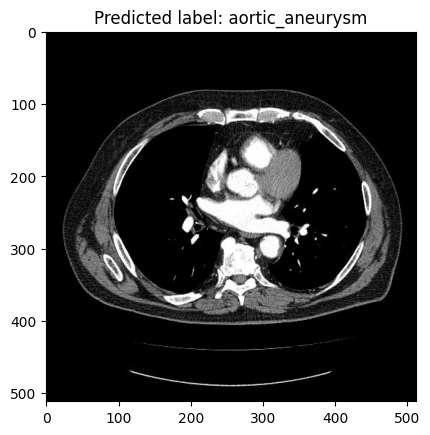

In [ ]:
# Load an individual image for classification
image_path = "/content/computed-tomography-ct-of-the-abdomen/files/files/aortic_aneurysm/0.jpg"  # Replace with the path to your image
img = image.load_img(image_path, target_size=(224, 224))  # Adjust target_size to match your model's input size
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = preprocess_input(img)  # You may need to define preprocess_input

# Predict the label for the image
prediction = model.predict(img)

# Assuming you have a list of class names

# Get the predicted class label
predicted_label = class_names[np.argmax(prediction[0])]


# Display the image
plt.imshow(image.load_img(image_path))
plt.title(f"Predicted label: {predicted_label}")
plt.show()